(1, 4, 100)


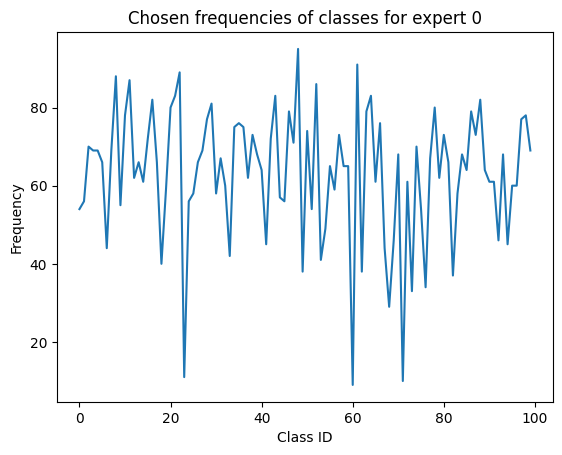

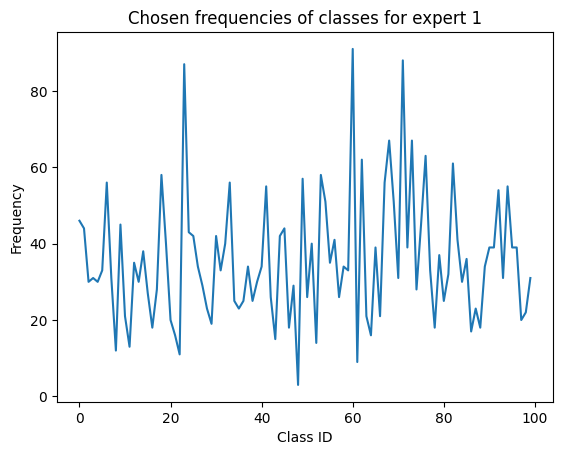

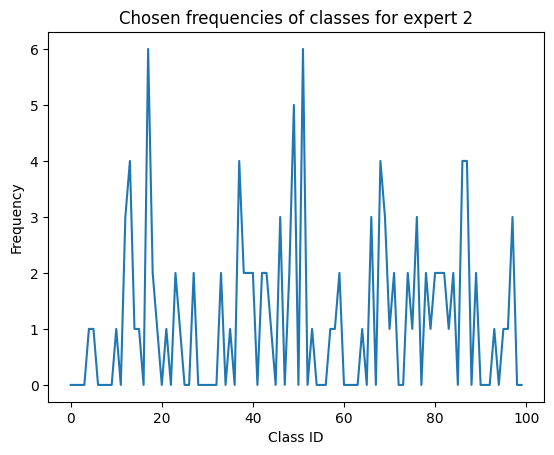

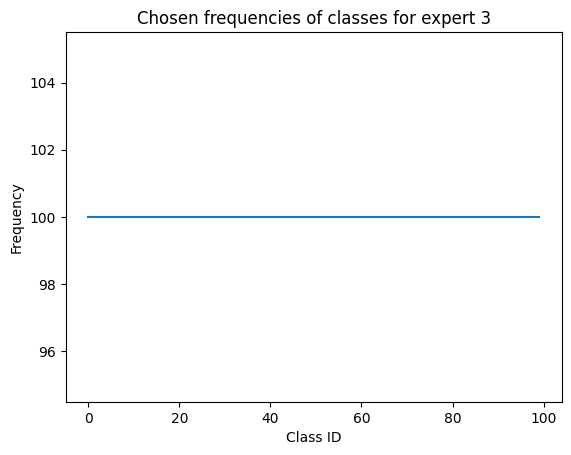

In [1]:
import matplotlib.pyplot as plt
import numpy as np

all_freq_from_experts_to_classes = np.load('/datapool/workspace/3024hlh/saved/log/Imbalance_CIFAR100_LT_ResNet32MoE/0911_140821/selected_experts_log_part_0_epoch_200.npy')
print(all_freq_from_experts_to_classes.shape)

for idx, freq_from_experts_to_classes in enumerate(all_freq_from_experts_to_classes):
    num_expert = freq_from_experts_to_classes.shape[0]
    classes_id = np.arange(100)
    for expert_id, freq_from_expert_to_classes in enumerate(freq_from_experts_to_classes):
        description = f'MoE Layer {idx} Chosen frequencies of classes for expert {expert_id}'
        plt.plot(classes_id, freq_from_expert_to_classes)
        plt.xlabel('Class ID')
        plt.ylabel('Frequency')
        plt.title(description)
        plt.show()